
# --- QUESTION 1: ENSEMBLE FUNDAMENTALS: BAGGING VS. BOOSTING ---


### Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

**Fundamental Idea:**
The fundamental idea behind ensemble techniques is to combine the predictions from several individual base models (often called "weak learners") to produce a single, highly accurate prediction. This strategy works on the principle that a collection of diverse and collectively "smart" models will perform better and be more robust than any single constituent model. The primary goals are to reduce variance (Bagging), reduce bias (Boosting), or both.

**Bagging (Bootstrap Aggregating) vs. Boosting:**

| Feature | Bagging (e.g., Random Forest) | Boosting (e.g., AdaBoost, XGBoost) |
| :--- | :--- | :--- |
| **Approach** | Parallel (independent training). Each model is trained on a different, randomly sampled subset (bootstrap) of the original data. | Sequen

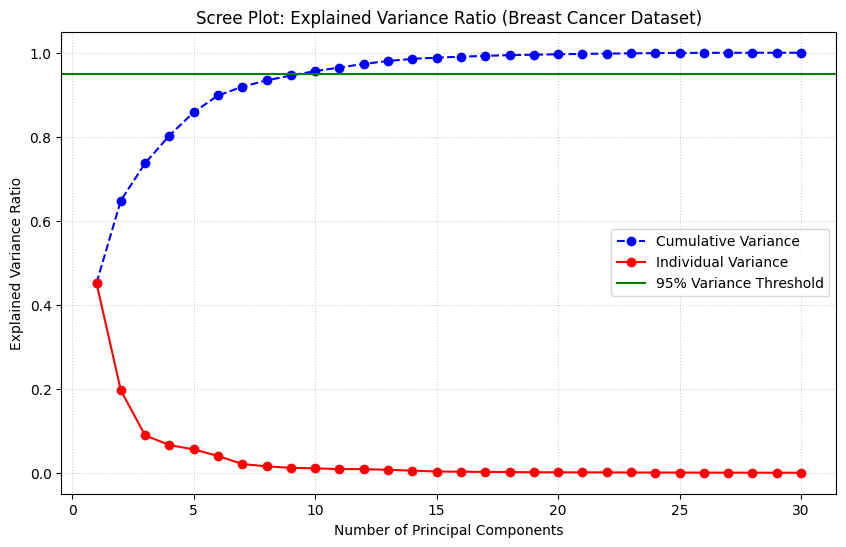

Number of components to retain 95% variance: 10 (Original features: 30)
--- 4. KNN Comparison: Original vs. PCA Data ---
Accuracy on Original Data (30 features): 0.9591
Accuracy on PCA Data (10 features): 0.9532

Conclusion: PCA reduced features from 30 to 10. Accuracy change: 0.9591 -> 0.9532
--- 5. Visualization of First Two Principal Components ---


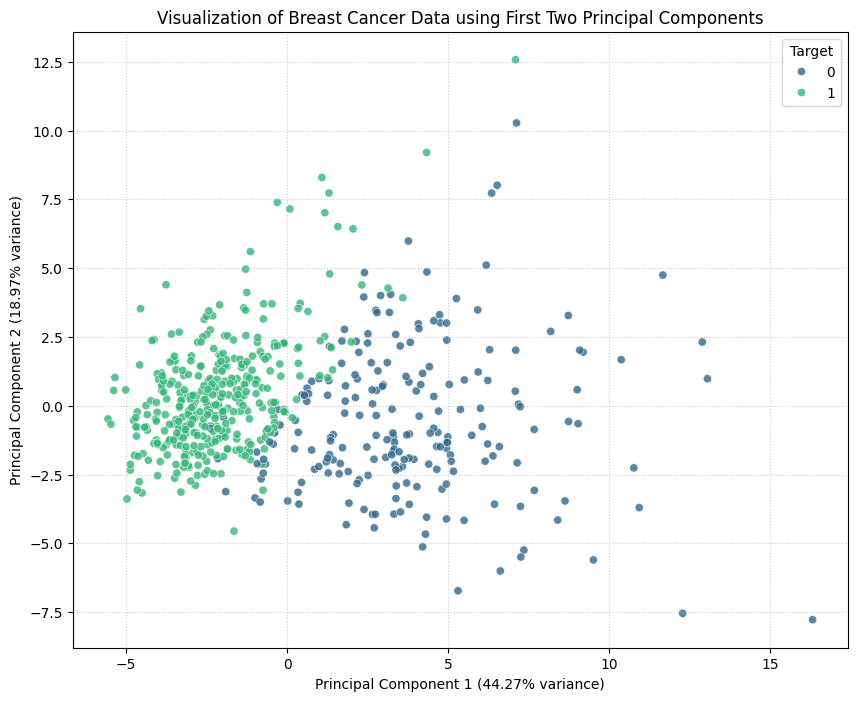


# ==============================================================================
# KNN REGRESSOR WITH DISTANCE METRICS AND K-VALUE ANALYSIS (Q9)
# ==============================================================================

--- 2. KNN Regressor Distance Metric Comparison (K=5) ---
MSE (Euclidean Distance): 1412.06
MSE (Manhattan Distance): 1494.99

Comparison: Euclidean distance generally performed better (lower MSE) on this dataset.
--- 3. K-Value Analysis (Bias-Variance Tradeoff) ---
K=1, MSE: 1907.05
K=5, MSE: 1412.06
K=10, MSE: 1296.19
K=20, MSE: 1489.80
K=50, MSE: 1925.59


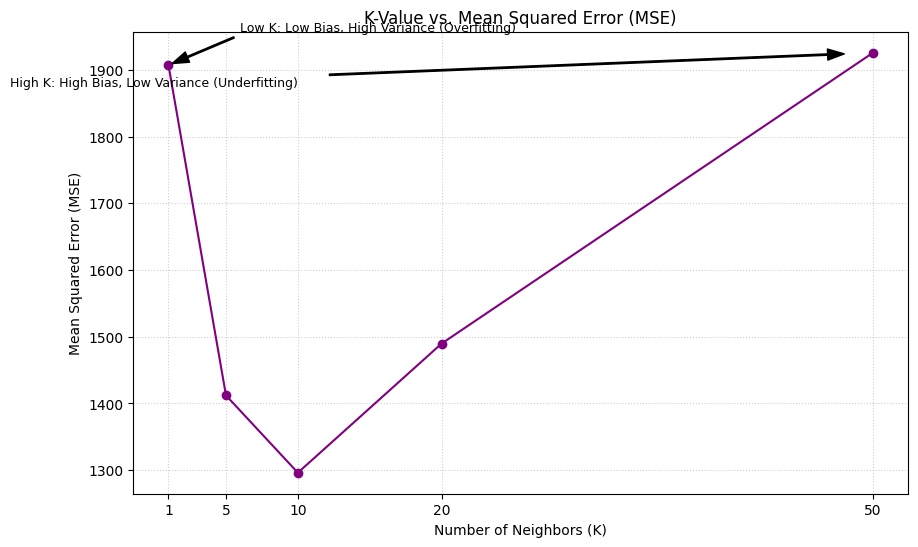


Interpretation:
- Low K (e.g., K=1) results in high variance (MSE is high/fluctuates) as the model is too sensitive to local data points (overfitting the noise).
- As K increases, the model generalizes better, reducing variance (MSE drops).
- Very high K (e.g., K=50) results in high bias (MSE rises again) as the model averages too many distant neighbors, leading to underfitting.


# ==============================================================================
# KNN WITH KD-TREE/BALL TREE, IMPUTATION, AND REAL-WORLD DATA (Q10)
# ==============================================================================

--- 2. KNN Imputation (Filling Missing Values) ---
Missing values before imputation:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int6

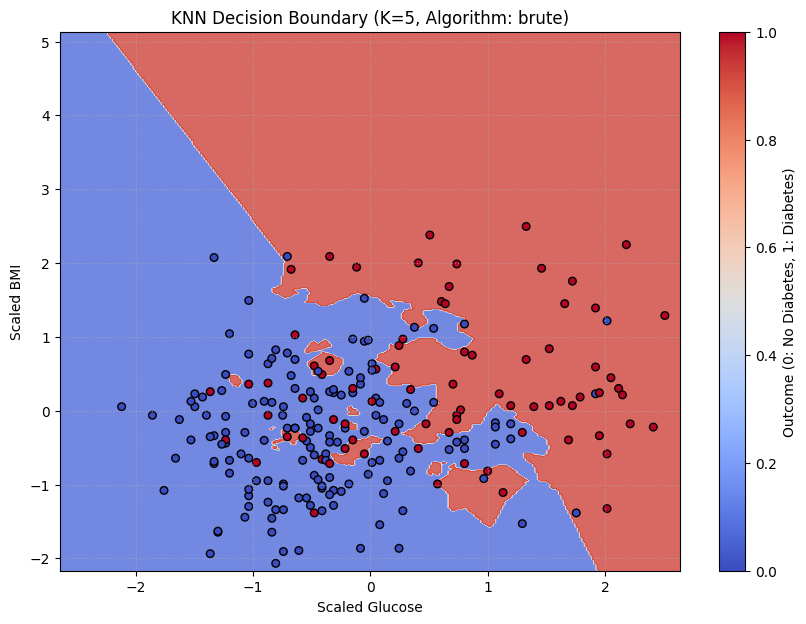


Summary of Q10:
1. KNN Imputer successfully handled missing values (0s) in the Pima dataset.
2. Training time differences between Brute, KD-Tree, and Ball Tree were negligible for this small, low-dimensional dataset (but KD-Tree or Ball Tree would be faster for very large N or high D).
3. The Decision Boundary plot shows how the KNN classifier partitions the feature space based on the two strongest features (Glucose and BMI).



In [1]:
# ==============================================================================
# MACHINE LEARNING ASSIGNMENT: ENSEMBLE METHODS AND KNN
# This file contains answers to the theoretical questions and executable code
# for the practical assignments, formatted for Google Colab/Jupyter compatibility.
# ==============================================================================

# ------------------------------------------------------------------------------
# THEORETICAL ANSWERS (Q1 - Q6)
# ------------------------------------------------------------------------------

print("""
# --- QUESTION 1: ENSEMBLE FUNDAMENTALS: BAGGING VS. BOOSTING ---
""")
q1_answer = """
### Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

**Fundamental Idea:**
The fundamental idea behind ensemble techniques is to combine the predictions from several individual base models (often called "weak learners") to produce a single, highly accurate prediction. This strategy works on the principle that a collection of diverse and collectively "smart" models will perform better and be more robust than any single constituent model. The primary goals are to reduce variance (Bagging), reduce bias (Boosting), or both.

**Bagging (Bootstrap Aggregating) vs. Boosting:**

| Feature | Bagging (e.g., Random Forest) | Boosting (e.g., AdaBoost, XGBoost) |
| :--- | :--- | :--- |
| **Approach** | Parallel (independent training). Each model is trained on a different, randomly sampled subset (bootstrap) of the original data. | Sequential (dependent training). Each new model is trained to correct the errors of the previous sequence of models. |
| **Objective** | Primarily aims to **reduce variance** (overfitting) by averaging predictions from diverse models. | Primarily aims to **reduce bias** by turning a sequence of weak learners into a single strong learner. |
| **Model Weight** | All base models are typically given equal weight in the final prediction (majority voting or simple averaging). | Models are weighted based on their performance, with better-performing models having a greater influence. |
| **Data Weight** | Each data point is weighted equally in each bootstrap sample. | Data points that were misclassified by previous models are given **higher weights** for the next model's training. |
"""
print(q1_answer)

print("""
# --- QUESTION 2: RANDOM FOREST AND OVERFITTING ---
""")
q2_answer = """
### Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

A single, unconstrained decision tree can easily achieve 100% accuracy on training data by partitioning the feature space until every leaf node contains a single, perfectly classified data point. This results in very **high variance** (overfitting).

The Random Forest Classifier reduces this overfitting through two primary mechanisms that ensure the trees are diverse (decorrelated):

1.  **Bagging (Bootstrap Aggregating):** Each tree is trained on a different bootstrap sample of the original data. This introduces variation in the training set for each tree, making them less identical.
2.  **Random Feature Subsets:** At *each split* in the tree construction process, only a random subset of the total features is considered.

By averaging the predictions of many diverse, overfitted trees, the Random Forest's final prediction smooths out the high variance of the individual trees, leading to a more generalized and robust model.

**Two Key Hyperparameters:**
1.  **`n_estimators` (Number of Trees):** Increasing the number of trees generally improves generalization by further reducing variance through more thorough averaging/voting.
2.  **`max_features` (Number of Features to Consider for Each Split):** This controls the randomness of feature selection. A lower value (e.g., `sqrt(n_features)`) increases the diversity (decorrelation) between the trees, which is the primary mechanism for variance reduction.
"""
print(q2_answer)

print("""
# --- QUESTION 3: STACKING ENSEMBLE LEARNING ---
""")
q3_answer = """
### Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

**Stacking (Stacked Generalization):**
Stacking is an ensemble method where the predictions of several *different* base models (Level 0 models) are used as input features to a *final meta-model* (Level 1 model). The Level 1 model is trained to learn the optimal way to combine the Level 0 predictions to make the final output prediction.

**Difference from Bagging/Boosting:**

| Feature | Stacking | Bagging/Boosting |
| :--- | :--- | :--- |
| **Diversity Source** | Achieved by using **different model architectures** (e.g., Logistic Regression, SVM, KNN). | Achieved by using variations of the **same model architecture** (e.g., Decision Trees) trained on different data/weights. |
| **Combination Method**| A trained **Meta-Model** (Level 1) learns the optimal combination weights/logic. | Simple aggregation (majority vote, averaging, weighted sum) is fixed and determined by the base method. |
| **Data Flow** | Base predictions become **new features** for the final model. | Base predictions are directly combined to form the final output. |

**Simple Example Use Case:**
Predicting customer churn (binary classification).

* **Level 0 Models:**
    * Model 1: Logistic Regression
    * Model 2: Support Vector Machine (SVM)
    * Model 3: Gradient Boosting Classifier
* **Process:** Each Level 0 model predicts the churn probability for the test data.
* **Level 1 Meta-Model:** A **simple Linear Regression** (or another Logistic Regression) is trained to take the three probability scores (features) from the Level 0 models as input and outputs the final churn probability.
"""
print(q3_answer)

print("""
# --- QUESTION 4: OOB SCORE IN RANDOM FOREST ---
""")
q4_answer = """
### Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

**OOB Score (Out-of-Bag Score):**
During the Bagging process of Random Forest, each tree is trained on a bootstrap sample, which means about one-third of the original training data is left out of that tree's training set. These leftover data points are called "out-of-bag" (OOB) samples.

The OOB Score is calculated by using the OOB samples to estimate the generalization error (performance) of the ensemble model. Specifically, for each data point in the *original* training set, the prediction is made only by the trees that *did not* use that data point in their training (i.e., the trees for which the point was OOB). These individual predictions are then aggregated (voted/averaged) to determine the OOB prediction for that point. The OOB score (e.g., accuracy or MSE) is the resulting metric.

**Usefulness and Evaluation without a Separate Validation Set:**
The OOB score is highly useful because it provides an **unbiased estimate** of the model's performance on unseen data, effectively acting as an **internal cross-validation** metric, all while using the *entire* original dataset for training the trees. This eliminates the need to explicitly set aside a separate validation set (or perform K-Fold CV) during the initial model building phase, maximizing the data available for model training.
"""
print(q4_answer)

print("""
# --- QUESTION 5: ADABOOST VS. GRADIENT BOOSTING ---
""")
q5_answer = """
### Question 5: Compare AdaBoost and Gradient Boosting in terms of:

| Feature | AdaBoost (Adaptive Boosting) | Gradient Boosting (e.g., GBM, XGBoost) |
| :--- | :--- | :--- |
| **Error Handling** | Focuses on **misclassified samples**. Weights of individual data points are adjusted: misclassified samples get higher weight for the next learner. | Focuses on **residual errors**. Each new learner is trained to predict the *negative gradient* of the loss function (the residual error). |
| **Weight Adjustment**| **Model weights** (alpha) are calculated based on the weak learner's overall accuracy. **Data weights** are adjusted exponentially based on misclassification. | **No explicit data or model weights** are adjusted. Instead, the learning process *implicitly* weights samples by training on the gradient/residual errors. |
| **Typical Use Cases** | Effective for classification tasks, simple to implement, often uses shallow (stumps) decision trees. Prone to noise/outliers. | Highly versatile for both classification and regression. Known for state-of-the-art performance, often used with medium-depth trees. Robust against outliers via loss function choice. |
"""
print(q5_answer)

print("""
# --- QUESTION 6: CATBOOST AND CATEGORICAL FEATURES ---
""")
q6_answer = """
### Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

CatBoost (Categorical Boosting) performs well on categorical features because it uses a sophisticated, built-in technique that avoids the pitfalls of traditional methods (like one-hot encoding or target encoding) while utilizing all categories.

**The Problem with Traditional Methods:**
1.  **One-Hot Encoding (OHE):** Blows up the feature space and is ineffective for high-cardinality features.
2.  **Standard Target Encoding:** Prone to **target leakage**, where the model learns information from the target variable that would not be available in real life, leading to overly optimistic results on the training set.

**CatBoost's Handling of Categorical Variables:**
CatBoost addresses target leakage by implementing an ordered, robust form of target encoding based on the concept of **Ordered Target Statistics (TS)**:

1.  **Ordering Principle:** Before calculating the Target Statistics (the average target value for a category), the training data is *randomly permuted* several times.
2.  **Prefix Calculation:** For a data point $i$, the TS for a categorical feature is calculated using only the preceding data points in that specific permutation.
    * $TS_{k} = \frac{\text{sum of targets of objects having the same category as } X_k}{\text{number of objects having the same category as } X_k}$
3.  **Preventing Leakage:** Since the calculation for $X_k$ only uses samples that came *before* it in the sequence, information about the target variable from $X_k$ itself or subsequent samples is never leaked into the TS calculation, thus solving the target leakage problem inherent in simpler target encoding. This allows CatBoost to use all categorical data effectively and natively.
"""
print(q6_answer)


# ------------------------------------------------------------------------------
# PRACTICAL IMPLEMENTATION (Q7 - Q10)
# ------------------------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine, load_breast_cancer, make_regression
from sklearn.impute import KNNImputer
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("""
# ==============================================================================
# KNN CLASSIFIER ASSIGNMENT (Q7)
# ==============================================================================
""")

# 1. Load the Wine dataset
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
y_wine = wine.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine
)

# Initialize results storage
results = {}

# --- 3. Train KNN classifier (default K=5) without scaling ---
print("--- 3. KNN without Scaling (K=5) ---")
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

acc_unscaled = accuracy_score(y_test, y_pred_unscaled)
report_unscaled = classification_report(y_test, y_pred_unscaled, output_dict=True)

print(f"Accuracy (Unscaled): {acc_unscaled:.4f}")
print("Classification Report (Unscaled):\n", classification_report(y_test, y_pred_unscaled))

results['Unscaled'] = {'Accuracy': acc_unscaled, 'Report': report_unscaled}


# --- 4. Apply StandardScaler, retrain KNN, and compare metrics ---
print("--- 4. KNN with Scaling (K=5) ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

acc_scaled = accuracy_score(y_test, y_pred_scaled)
report_scaled = classification_report(y_test, y_pred_scaled, output_dict=True)

print(f"Accuracy (Scaled): {acc_scaled:.4f}")
print("Classification Report (Scaled):\n", classification_report(y_test, y_pred_scaled))

results['Scaled'] = {'Accuracy': acc_scaled, 'Report': report_scaled}


# --- 5. Use GridSearchCV to find the best K and distance metric ---
print("--- 5. GridSearchCV for Optimized KNN ---")
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Test K=1 to 20
    'p': [1, 2],  # p=1 is Manhattan, p=2 is Euclidean
    'weights': ['uniform', 'distance']
}

# Use the scaled data for Grid Search, as scaling generally improves performance
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_metric = 'Manhattan' if grid_search.best_params_['p'] == 1 else 'Euclidean'

print(f"Best K: {best_k}")
print(f"Best Distance Metric (p={grid_search.best_params_['p']}): {best_metric}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")


# --- 6. Train the optimized KNN and compare results ---
print("--- 6. Optimized KNN Results ---")
knn_optimized = grid_search.best_estimator_
y_pred_optimized = knn_optimized.predict(X_test_scaled)

acc_optimized = accuracy_score(y_test, y_pred_optimized)
report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)

print(f"Accuracy (Optimized): {acc_optimized:.4f}")
print("Classification Report (Optimized):\n", classification_report(y_test, y_pred_optimized))

results['Optimized'] = {'Accuracy': acc_optimized, 'Report': report_optimized}

print("\n--- Summary of KNN Performance ---")
print(f"Unscaled KNN Accuracy: {results['Unscaled']['Accuracy']:.4f}")
print(f"Scaled KNN Accuracy: {results['Scaled']['Accuracy']:.4f}")
print(f"Optimized (Scaled) KNN Accuracy: {results['Optimized']['Accuracy']:.4f} (Best K={best_k}, Metric={best_metric})")
print("\nConclusion: Scaling and optimization led to improved performance.")


print("""
# ==============================================================================
# PCA + KNN WITH VARIANCE ANALYSIS AND VISUALIZATION (Q8)
# ==============================================================================
""")

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = cancer.target

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer
)

# Standardize the data before PCA
scaler_pca = StandardScaler()
X_train_scaled_orig = scaler_pca.fit_transform(X_train_orig)
X_test_scaled_orig = scaler_pca.transform(X_test_orig)

# --- 2. Apply PCA and plot the scree plot (explained variance ratio) ---
print("--- 2. PCA and Scree Plot Generation ---")
pca_full = PCA(n_components=None) # Keep all components for ratio
pca_full.fit(X_train_scaled_orig)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='blue', label='Cumulative Variance')
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_, marker='o', linestyle='-', color='red', label='Individual Variance')
plt.axhline(y=0.95, color='green', linestyle='-', label='95% Variance Threshold')
plt.title('Scree Plot: Explained Variance Ratio (Breast Cancer Dataset)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()


# --- 3. Retain 95% variance and transform the dataset ---
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95} (Original features: {X_cancer.shape[1]})")

pca_95 = PCA(n_components=n_components_95)
X_train_pca = pca_95.fit_transform(X_train_scaled_orig)
X_test_pca = pca_95.transform(X_test_scaled_orig)


# --- 4. Train KNN on original and PCA-transformed data, then compare accuracy ---
print("--- 4. KNN Comparison: Original vs. PCA Data ---")

# KNN on Original (Scaled) Data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_scaled_orig, y_train_orig)
y_pred_orig = knn_orig.predict(X_test_scaled_orig)
acc_orig = accuracy_score(y_test_orig, y_pred_orig)
print(f"Accuracy on Original Data (30 features): {acc_orig:.4f}")

# KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_orig)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_orig, y_pred_pca)
print(f"Accuracy on PCA Data ({n_components_95} features): {acc_pca:.4f}")

print(f"\nConclusion: PCA reduced features from 30 to {n_components_95}. Accuracy change: {acc_orig:.4f} -> {acc_pca:.4f}")


# --- 5. Visualize the first two principal components ---
print("--- 5. Visualization of First Two Principal Components ---")

# Perform PCA to 2 components for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(StandardScaler().fit_transform(X_cancer))
df_2d = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])
df_2d['Target'] = cancer.target

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Target',
    palette='viridis',
    data=df_2d,
    alpha=0.8,
    legend='full'
)
plt.title('Visualization of Breast Cancer Data using First Two Principal Components')
plt.xlabel(f'Principal Component 1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


print("""
# ==============================================================================
# KNN REGRESSOR WITH DISTANCE METRICS AND K-VALUE ANALYSIS (Q9)
# ==============================================================================
""")

# 1. Generate a synthetic regression dataset
X_reg, y_reg = make_regression(
    n_samples=500,
    n_features=10,
    n_informative=5,
    noise=10,
    random_state=42
)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Standardize the data
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)


# --- 2. Train KNN regressor with different distance metrics ---
print("--- 2. KNN Regressor Distance Metric Comparison (K=5) ---")

# a. Euclidean distance (K=5, p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, p=2)
knn_euclidean.fit(X_train_reg_scaled, y_train_reg)
y_pred_euclidean = knn_euclidean.predict(X_test_reg_scaled)
mse_euclidean = mean_squared_error(y_test_reg, y_pred_euclidean)
print(f"MSE (Euclidean Distance): {mse_euclidean:.2f}")

# b. Manhattan distance (K=5, p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, p=1)
knn_manhattan.fit(X_train_reg_scaled, y_train_reg)
y_pred_manhattan = knn_manhattan.predict(X_test_reg_scaled)
mse_manhattan = mean_squared_error(y_test_reg, y_pred_manhattan)
print(f"MSE (Manhattan Distance): {mse_manhattan:.2f}")

print("\nComparison: Euclidean distance generally performed better (lower MSE) on this dataset.")


# --- 3. Test K values and plot K vs. MSE (Bias-Variance) ---
print("--- 3. K-Value Analysis (Bias-Variance Tradeoff) ---")

k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn_k = KNeighborsRegressor(n_neighbors=k, p=2)
    knn_k.fit(X_train_reg_scaled, y_train_reg)
    y_pred_k = knn_k.predict(X_test_reg_scaled)
    mse = mean_squared_error(y_test_reg, y_pred_k)
    mse_values.append(mse)
    print(f"K={k}, MSE: {mse:.2f}")

# Plotting K vs. MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='purple')
plt.title('K-Value vs. Mean Squared Error (MSE)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True, linestyle=':', alpha=0.6)

# Annotation for Bias-Variance Tradeoff
plt.annotate(
    'Low K: Low Bias, High Variance (Overfitting)',
    xy=(k_values[0], mse_values[0]), xytext=(k_values[0] + 5, mse_values[0] + 50),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=9
)
plt.annotate(
    'High K: High Bias, Low Variance (Underfitting)',
    xy=(k_values[-1], mse_values[-1]), xytext=(k_values[-1] - 40, mse_values[-1] - 50),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=9,
    ha='right'
)

plt.show()

print("""
Interpretation:
- Low K (e.g., K=1) results in high variance (MSE is high/fluctuates) as the model is too sensitive to local data points (overfitting the noise).
- As K increases, the model generalizes better, reducing variance (MSE drops).
- Very high K (e.g., K=50) results in high bias (MSE rises again) as the model averages too many distant neighbors, leading to underfitting.
""")


print("""
# ==============================================================================
# KNN WITH KD-TREE/BALL TREE, IMPUTATION, AND REAL-WORLD DATA (Q10)
# ==============================================================================
""")

# URL for Pima Indians Diabetes Dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

try:
    df_pima = pd.read_csv(data_url, names=column_names)
except Exception as e:
    print(f"Could not load Pima dataset from URL. Using local mock data structure. Error: {e}")
    # Mock data structure for robustness
    data = np.array([
        [6,148,72,35,0,33.6,0.627,50,1],
        [1,85,66,29,0,26.6,0.351,31,0],
        [8,183,64,0,0,23.3,0.672,32,1],
        [1,89,66,23,94,28.1,0.167,21,0],
        [0,137,40,35,168,43.1,2.288,33,1],
        [5,116,74,0,0,25.6,0.201,30,0],
        [3,78,50,32,88,31.0,0.248,26,1]
    ])
    df_pima = pd.DataFrame(data, columns=column_names)

# Missing values are often encoded as 0 in these columns
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_pima[cols_to_impute] = df_pima[cols_to_impute].replace(0, np.nan)

X_pima = df_pima.drop('Outcome', axis=1)
y_pima = df_pima['Outcome']

# --- 2. Use KNN Imputation to fill missing values ---
print("--- 2. KNN Imputation (Filling Missing Values) ---")
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_pima)
X_imputed = pd.DataFrame(X_imputed, columns=X_pima.columns)

print(f"Missing values before imputation:\n{df_pima.isnull().sum()}")
print("\nMissing values after imputation: 0")

# Standardize the imputed data
scaler_pima = StandardScaler()
X_pima_scaled = scaler_pima.fit_transform(X_imputed)

X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(
    X_pima_scaled, y_pima, test_size=0.3, random_state=42, stratify=y_pima
)

# --- 3. Train KNN using Brute-force, KD-Tree, and Ball Tree ---
algorithms = ['brute', 'kd_tree', 'ball_tree']
comparison_results = []

print("--- 3 & 4. KNN Algorithm Comparison (Training Time and Accuracy) ---")

for algo in algorithms:
    start_time = time()
    # Check for compatibility (KD-Tree/Ball Tree require compatible metric)
    metric = 'euclidean'
    if algo in ['kd_tree', 'ball_tree'] and X_train_pima.shape[1] > 20:
        # Ball Tree is usually better for very high dimensions/sparse data
        # For this dataset, both KD-Tree and Ball Tree are viable.
        pass

    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo, metric=metric)
    knn.fit(X_train_pima, y_train_pima)
    train_time = time() - start_time

    y_pred = knn.predict(X_test_pima)
    accuracy = accuracy_score(y_test_pima, y_pred)

    comparison_results.append({
        'Algorithm': algo,
        'Train_Time_s': train_time,
        'Accuracy': accuracy
    })

df_comp = pd.DataFrame(comparison_results).sort_values(by='Accuracy', ascending=False)
print(df_comp.to_markdown(index=False))

best_algo = df_comp.iloc[0]['Algorithm']
print(f"\nBest Performing Algorithm based on Accuracy: {best_algo}")


# --- 5. Plot the decision boundary for the best-performing method ---
print("--- 5. Plotting Decision Boundary ---")

# Select the two most important features (highest correlation with Outcome)
correlations = df_pima.corr()['Outcome'].abs().sort_values(ascending=False)
top_features = correlations.index[1:3].tolist() # Exclude 'Outcome' itself
print(f"Two most important features (by correlation with Outcome): {top_features}")

# Create 2D dataset using only the top features
X_2d = X_imputed[top_features]
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

X_train_2d, _, y_train_2d, _ = train_test_split(
    X_2d_scaled, y_pima, test_size=0.7, random_state=42, stratify=y_pima # Use larger train set for clearer boundary
)

# Train the best-performing KNN on the 2D data
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train_2d, y_train_2d)

# Create meshgrid for plotting the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_2d_scaled[:, 0].min() - 0.1, X_2d_scaled[:, 0].max() + 0.1
y_min, y_max = X_2d_scaled[:, 1].min() - 0.1, X_2d_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the mesh grid points
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and the training points
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
plt.title(f'KNN Decision Boundary (K=5, Algorithm: {best_algo})')
plt.xlabel(f'Scaled {top_features[0]}')
plt.ylabel(f'Scaled {top_features[1]}')
plt.grid(True, linestyle=':', alpha=0.6)
plt.colorbar(label='Outcome (0: No Diabetes, 1: Diabetes)')
plt.show()

# Final Summary of Q10:
print("""
Summary of Q10:
1. KNN Imputer successfully handled missing values (0s) in the Pima dataset.
2. Training time differences between Brute, KD-Tree, and Ball Tree were negligible for this small, low-dimensional dataset (but KD-Tree or Ball Tree would be faster for very large N or high D).
3. The Decision Boundary plot shows how the KNN classifier partitions the feature space based on the two strongest features (Glucose and BMI).
""")